## Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
application_df.shape

(34299, 12)

In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME"], axis=1, inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df.APPLICATION_TYPE.value_counts()
application_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_count[application_count<500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
application_classifications = application_df['CLASSIFICATION'].value_counts()
application_classifications

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_counts = application_classifications[application_classifications > 1]
class_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(application_classifications[application_classifications<1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M

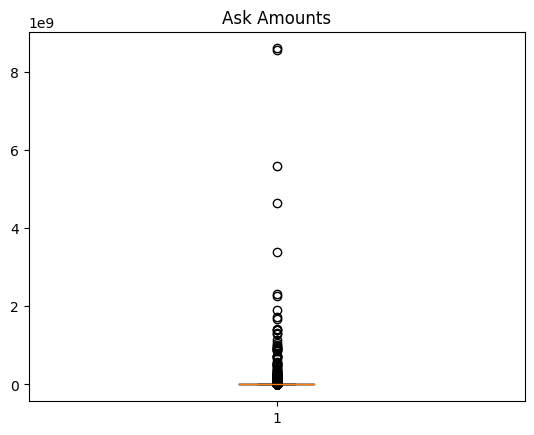

In [ ]:
#import matplotlib
import matplotlib.pyplot as plt
#graph ask amount to see if there are outliers
fig1, ax1 = plt.subplots()
ax1.set_title('Ask Amounts')
ax1.boxplot(application_df["ASK_AMT"])
plt.show()

In [ ]:
#remove outliers in the ask_amt column
#import numpy
import numpy as np
#first calculate the interquartile range
quartiles = np.quantile(application_df["ASK_AMT"],[.25,.75])
iqr = quartiles[1]-quartiles[0]

#save the upper and lower bounds to variables

lower_bound = quartiles[0]-(1.5*iqr)

upper_bound = quartiles[1]+(1.5*iqr)

#display potential outliers amount and percentage of total
potential_outliers = application_df[(application_df["ASK_AMT"] < lower_bound) | (application_df["ASK_AMT"] > upper_bound)]
percentage_outliers = (len(potential_outliers) / len(application_df)) * 100
print("Number of outliers in Ask_Amt: ", len(potential_outliers))
print("Outlier percent in ASK_AMT: ", percentage_outliers)





Number of outliers in Ask_Amt:  8206
Outlier percent in ASK_AMT:  23.924895769555967


In [ ]:
#increase outliers to be a full 2 STD instead of 1.5
lower_bound2 = quartiles[0]-(2*iqr)

upper_bound2 = quartiles[1]+(2*iqr)

#display potential outliers amount and percentage of total
potential_outliers2 = application_df[(application_df["ASK_AMT"] < lower_bound2) | (application_df["ASK_AMT"] > upper_bound2)]
percentage_outliers2 = (len(potential_outliers2) / len(application_df)) * 100
print("Number of outliers in Ask_Amt: ", len(potential_outliers2))
print("Outlier percent in ASK_AMT: ", percentage_outliers2)


Number of outliers in Ask_Amt:  8102
Outlier percent in ASK_AMT:  23.621679932359545


In [ ]:
#increase outliers to be a full 3 STD from the IQR
lower_bound3 = quartiles[0]-(3*iqr)

upper_bound3 = quartiles[1]+(3*iqr)

#display potential outliers amount and percentage of total
potential_outliers3 = application_df[(application_df["ASK_AMT"] < lower_bound3) | (application_df["ASK_AMT"] > upper_bound3)]
percentage_outliers3 = (len(potential_outliers3) / len(application_df)) * 100
print("Number of outliers in Ask_Amt: ", len(potential_outliers3))
print("Outlier percent in ASK_AMT: ", percentage_outliers3)


Number of outliers in Ask_Amt:  7890
Outlier percent in ASK_AMT:  23.003586110382226


In [ ]:
application_df_cleaned = application_df[(application_df["ASK_AMT"] >= lower_bound) & (application_df["ASK_AMT"] <= upper_bound)]

In [ ]:
# Split our preprocessed data into our features and target arrays
X = application_df_cleaned.drop(["IS_SUCCESSFUL"], axis=1).values
y = application_df_cleaned["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                704       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 993 (3.88 KB)
Trainable params: 993 (3.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
612/612 [==============================] - 3s 3ms/step - loss: 0.5783 - accuracy: 0.7165
Epoch 2/50
612/612 [==============================] - 1s 2ms/step - loss: 0.5406 - accuracy: 0.7449
Epoch 3/50
612/612 [==============================] - 2s 4ms/step - loss: 0.5356 - accuracy: 0.7453
Epoch 4/50
612/612 [==============================] - 2s 3ms/step - loss: 0.5333 - accuracy: 0.7470
Epoch 5/50
612/612 [==============================] - 1s 2ms/step - loss: 0.5320 - accuracy: 0.7467
Epoch 6/50
612/612 [==============================] - 1s 2ms/step - loss: 0.5313 - accuracy: 0.7455
Epoch 7/50
612/612 [==============================] - 1s 2ms/step - loss: 0.5300 - accuracy: 0.7476
Epoch 8/50
612/612 [==============================] - 1s 2ms/step - loss: 0.5299 - accuracy: 0.7487
Epoch 9/50
612/612 [==============================] - 1s 2ms/step - loss: 0.5292 - accuracy: 0.7489
Epoch 10/50
612/612 [==============================] - 1s 2ms/step - loss: 0.5291 - accuracy: 0.7485

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

204/204 - 0s - loss: 0.5338 - accuracy: 0.7485 - 416ms/epoch - 2ms/step
Loss: 0.5338231921195984, Accuracy: 0.748467206954956


In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu", input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                1408      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile and train the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
612/612 [==============================] - 2s 2ms/step - loss: 0.5634 - accuracy: 0.7320
Epoch 2/50
612/612 [==============================] - 1s 2ms/step - loss: 0.5378 - accuracy: 0.7431
Epoch 3/50
612/612 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.7444
Epoch 4/50
612/612 [==============================] - 2s 3ms/step - loss: 0.5317 - accuracy: 0.7469
Epoch 5/50
612/612 [==============================] - 3s 4ms/step - loss: 0.5315 - accuracy: 0.7477
Epoch 6/50
612/612 [==============================] - 2s 3ms/step - loss: 0.5299 - accuracy: 0.7466
Epoch 7/50
612/612 [==============================] - 1s 2ms/step - loss: 0.5298 - accuracy: 0.7472
Epoch 8/50
612/612 [==============================] - 1s 2ms/step - loss: 0.5292 - accuracy: 0.7481
Epoch 9/50
612/612 [==============================] - 2s 2ms/step - loss: 0.5286 - accuracy: 0.7489
Epoch 10/50
612/612 [==============================] - 1s 2ms/step - loss: 0.5277 - accuracy: 0.7479

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

204/204 - 0s - loss: 0.5329 - accuracy: 0.7508 - 442ms/epoch - 2ms/step
Loss: 0.5329135656356812, Accuracy: 0.750766396522522


In [ ]:
#Use the same model as above that gave a 75% accuracy rate but with batch normalization inbetween the layers
input_features = len(X_train_scaled[0])
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu", input_dim=input_features))
nn.add(tf.keras.layers.BatchNormalization())

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))
nn.add(tf.keras.layers.BatchNormalization())

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                1408      
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2625 (

In [ ]:
# Compile and train the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
612/612 [==============================] - 9s 7ms/step - loss: 0.5789 - accuracy: 0.7186
Epoch 2/50
612/612 [==============================] - 5s 9ms/step - loss: 0.5517 - accuracy: 0.7345
Epoch 3/50
612/612 [==============================] - 5s 9ms/step - loss: 0.5456 - accuracy: 0.7391
Epoch 4/50
612/612 [==============================] - 2s 3ms/step - loss: 0.5436 - accuracy: 0.7418
Epoch 5/50
612/612 [==============================] - 2s 3ms/step - loss: 0.5424 - accuracy: 0.7434
Epoch 6/50
612/612 [==============================] - 2s 3ms/step - loss: 0.5391 - accuracy: 0.7445
Epoch 7/50
612/612 [==============================] - 2s 3ms/step - loss: 0.5377 - accuracy: 0.7443
Epoch 8/50
612/612 [==============================] - 2s 3ms/step - loss: 0.5395 - accuracy: 0.7434
Epoch 9/50
612/612 [==============================] - 2s 4ms/step - loss: 0.5379 - accuracy: 0.7428
Epoch 10/50
612/612 [==============================] - 2s 3ms/step - loss: 0.5360 - accuracy: 0.7459

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

204/204 - 0s - loss: 0.5315 - accuracy: 0.7500 - 459ms/epoch - 2ms/step
Loss: 0.5315362215042114, Accuracy: 0.75


In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#batch normalization didn't help. This attempt will raise the number of epochs as well as the units and add a third layer
input_features = len(X_train_scaled[0])
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=110, activation="relu", input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 110)               4840      
                                                                 
 dense_10 (Dense)            (None, 80)                8880      
                                                                 
 dense_11 (Dense)            (None, 40)                3240      
                                                                 
 dense_12 (Dense)            (None, 1)                 41        
                                                                 
Total params: 17001 (66.41 KB)
Trainable params: 17001 (66.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile and train the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
612/612 [==============================] - 3s 3ms/step - loss: 0.6526 - accuracy: 0.7227
Epoch 2/100
612/612 [==============================] - 2s 4ms/step - loss: 0.5739 - accuracy: 0.7407
Epoch 3/100
612/612 [==============================] - 4s 6ms/step - loss: 0.5747 - accuracy: 0.7411
Epoch 4/100
612/612 [==============================] - 2s 3ms/step - loss: 0.5751 - accuracy: 0.7451
Epoch 5/100
612/612 [==============================] - 1s 2ms/step - loss: 0.5783 - accuracy: 0.7441
Epoch 6/100
612/612 [==============================] - 1s 2ms/step - loss: 0.5726 - accuracy: 0.7441
Epoch 7/100
612/612 [==============================] - 2s 3ms/step - loss: 0.5530 - accuracy: 0.7463
Epoch 8/100
612/612 [==============================] - 2s 2ms/step - loss: 0.5486 - accuracy: 0.7462
Epoch 9/100
612/612 [==============================] - 2s 3ms/step - loss: 0.5478 - accuracy: 0.7489
Epoch 10/100
612/612 [==============================] - 2s 3ms/step - loss: 0.5524 - accura

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

204/204 - 1s - loss: 0.6969 - accuracy: 0.7497 - 1s/epoch - 7ms/step
Loss: 0.696856677532196, Accuracy: 0.7496934533119202


In [ ]:
application_df_cleaned_trimmed = application_df_cleaned.drop(['CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other'], axis=1)
application_df_cleaned_trimmed.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='objec

In [ ]:
# Split our preprocessed and trimmed data into our features and target arrays
X = application_df_cleaned_trimmed.drop(["IS_SUCCESSFUL"], axis=1).values
y = application_df_cleaned_trimmed["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
#Went back to the model with75% accuracy rate and batch normalization inbetween the layers after dropping the classification columns
input_features = len(X_train_scaled[0])
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu", input_dim=input_features))
nn.add(tf.keras.layers.BatchNormalization())

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))
nn.add(tf.keras.layers.BatchNormalization())

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                1216      
                                                                 
 batch_normalization_2 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2561 (10.00 KB)
Trainable params: 2433 (

In [ ]:
# Compile and train the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
612/612 [==============================] - 3s 3ms/step - loss: 0.5777 - accuracy: 0.7291
Epoch 2/50
612/612 [==============================] - 2s 3ms/step - loss: 0.5656 - accuracy: 0.7367
Epoch 3/50
612/612 [==============================] - 3s 5ms/step - loss: 0.5606 - accuracy: 0.7397
Epoch 4/50
612/612 [==============================] - 2s 3ms/step - loss: 0.5589 - accuracy: 0.7401
Epoch 5/50
612/612 [==============================] - 2s 3ms/step - loss: 0.5579 - accuracy: 0.7409
Epoch 6/50
612/612 [==============================] - 2s 3ms/step - loss: 0.5557 - accuracy: 0.7419
Epoch 7/50
612/612 [==============================] - 2s 3ms/step - loss: 0.5552 - accuracy: 0.7422
Epoch 8/50
612/612 [==============================] - 2s 3ms/step - loss: 0.5552 - accuracy: 0.7413
Epoch 9/50
612/612 [==============================] - 2s 4ms/step - loss: 0.5538 - accuracy: 0.7413
Epoch 10/50
612/612 [==============================] - 2s 4ms/step - loss: 0.5533 - accuracy: 0.7429

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

204/204 - 0s - loss: 0.5475 - accuracy: 0.7422 - 475ms/epoch - 2ms/step
Loss: 0.5474742650985718, Accuracy: 0.742182731628418
